<a href="https://colab.research.google.com/github/arunshi01/Assignment-Logistic-Regression/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bagging & Boosting KNN & Stacking Assignment**

1) What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Ensemble techniques are based on the fundamental idea that combining multiple models (often called base learners or weak learners) can lead to better overall performance than any individual model. The key assumption is that while individual models may make errors, combining their outputs can reduce variance, bias, or improve predictions through aggregation.

Bagging (short for Bootstrap Aggregating) aims to reduce variance and prevent overfitting by training multiple models in parallel on different random subsets of the training data (created through bootstrap sampling). Each model is trained independently, and their outputs are combined—usually by averaging (for regression) or majority voting (for classification)—to produce the final prediction.

In contrast, boosting focuses on reducing bias and improving overall model accuracy by training models sequentially. In this approach, each new model is trained to correct the errors made by the previous one. Boosting gives more weight to misclassified instances so that subsequent models focus more on the harder cases. The final prediction is typically a weighted combination of all the models, where better-performing models contribute more.

2) Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

A Random Forest Classifier reduces overfitting compared to a single decision tree by introducing randomness and averaging to stabilize predictions and minimize variance.

A single decision tree is prone to overfitting because it can learn patterns that are specific to the training data, especially if it's deep and unpruned. In contrast, a Random Forest builds multiple decision trees using different subsets of data and features, then combines their outputs (majority voting for classification). This ensemble approach makes the model more robust and generalizable.

Two Key Hyperparameters That Help Control Overfitting:

n_estimators (Number of Trees):
This determines how many decision trees are in the forest. More trees generally lead to better averaging and more stable predictions, reducing variance and overfitting—up to a point of diminishing returns.

max_features (Number of Features Considered for Splitting):
This controls how many features are randomly chosen at each split. A lower value increases diversity among trees, which can reduce overfitting by preventing the same strong predictors from dominating every tree.

3) What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Stacking (or stacked generalization) is an ensemble learning technique where multiple different models (often called base learners) are trained on the same dataset, and their predictions are then used as input for a meta-model (also called a blender or meta-learner) that learns how to best combine those predictions to make the final decision.

The key difference lies in how the final prediction is made: in bagging, predictions from base models are averaged (for regression) or voted on (for classification) to reduce variance; in boosting, models are trained sequentially, with each new model focusing on correcting the errors of the previous ones to reduce bias. In stacking, however, the focus is on leveraging the strengths of various different models by training a separate model to intelligently combine their outputs, which often leads to improved overall accuracy.

A simple use case of stacking could be in a loan default prediction system where base models like logistic regression, decision trees, and SVM are trained on historical data. Their predictions are then fed into a meta-model (like a gradient boosting classifier), which learns to make a final decision based on how each base model performs across different types of input data.

4) What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

The OOB (Out-of-Bag) Score in a Random Forest is an internal performance estimate that allows the model to be evaluated without needing a separate validation set. It takes advantage of the bootstrap sampling technique used during training.

Why Is It Useful?

-No Need for a Validation Set:
OOB scoring provides a built-in cross-validation-like performance estimate, saving data that would otherwise be set aside for validation.

-Efficient Evaluation:
Since it leverages the training process, there's no extra computational cost for evaluating the model’s performance.

-Reliable Generalization Estimate:
The OOB score offers a good approximation of the model's generalization error, especially when the number of trees is large.

OOB score uses only the part of the data not seen by each tree to test its performance, so it acts similarly to a cross-validation approach. This makes it possible to get an unbiased estimate of model performance using only the training set, thus maximizing the data available for model learning.

5) Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

1) Handling Errors from Weak Learners

-AdaBoost:
Focuses on misclassified samples by increasing their weights in each iteration. It trains each new weak learner to pay more attention to the harder (previously misclassified) instances.

-Gradient Boosting:
Focuses on reducing the residual errors (the difference between actual and predicted values). It treats boosting as an optimization problem and fits each new learner to the gradients (errors) of the previous model.

2. Weight Adjustment Mechanism

-AdaBoost:
Assigns weights to training samples, increasing weights of misclassified ones and decreasing weights of correctly classified ones. Also assigns weights to models based on their accuracy.

-Gradient Boosting:
No direct weighting of samples. Instead, it fits new models to the negative gradient of a loss function (e.g., log loss for classification, squared error for regression), gradually improving performance.

3. Typical Use Cases

-AdaBoost:

Best with clean, low-noise datasets.

Used in binary classification tasks (e.g., face detection, spam filtering).

Performs well with simple weak learners like decision stumps.

-Gradient Boosting:

More flexible and powerful, works well with both classification and regression.

Common in structured/tabular data (e.g., customer churn, credit scoring).

Can handle more complex relationships and is widely used in Kaggle competitions (e.g., XGBoost, LightGBM).

6) 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

CatBoost performs well on categorical features without requiring extensive preprocessing because it is specifically designed to natively handle categorical variables using techniques that preserve information and prevent overfitting.

How CatBoost Handles Categorical Features:

1)No Need for One-Hot or Label Encoding:
Unlike traditional models (e.g., XGBoost or LightGBM), which require manual one-hot encoding or label encoding, CatBoost automatically processes categorical columns internally, preserving their structure and meaning.

2)Target Statistics (Mean Encoding) with Permutation:
CatBoost transforms categorical values into numerical representations by calculating target statistics—like the average target value for each category.
To avoid target leakage, it uses a technique called ordered or permutation-based target encoding. This means the encoding for a data point is calculated using only data that comes before it in a randomized order, not the entire dataset.

3)Efficient and Safe Encoding:
The use of ordered target statistics helps prevent overfitting, which is a common risk with traditional target encoding methods. It makes CatBoost both accurate and robust, especially when dealing with high-cardinality categorical features.

7)  KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load data and split
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42, stratify=wine.target)

# Train KNN without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Without Scaling Accuracy:", accuracy_score(y_test, y_pred))
print("Without Scaling Report:\n", classification_report(y_test, y_pred))

# Scale data and retrain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("With Scaling Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("With Scaling Report:\n", classification_report(y_test, y_pred_scaled))

# GridSearchCV for best K and metric
param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)

# Train optimized model
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("Optimized KNN Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized KNN Report:\n", classification_report(y_test, y_pred_best))


Without Scaling Accuracy: 0.7222222222222222
Without Scaling Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

With Scaling Accuracy: 0.9444444444444444
With Scaling Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best Params: {'metric': 'euclidean', 'n_neighbors': 11}
Optimized KNN Accuracy: 0.9629629629629629
Optim

8) PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).


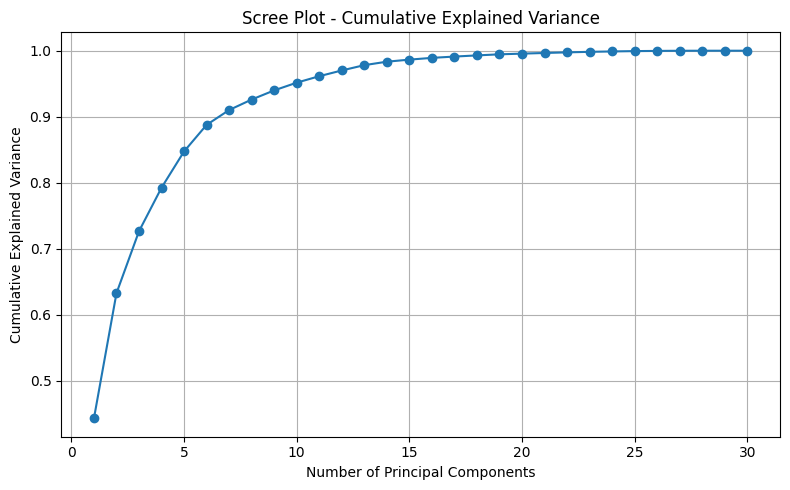

Accuracy on Original Data: 0.9708
Accuracy on PCA-Reduced Data (95% variance): 0.9474


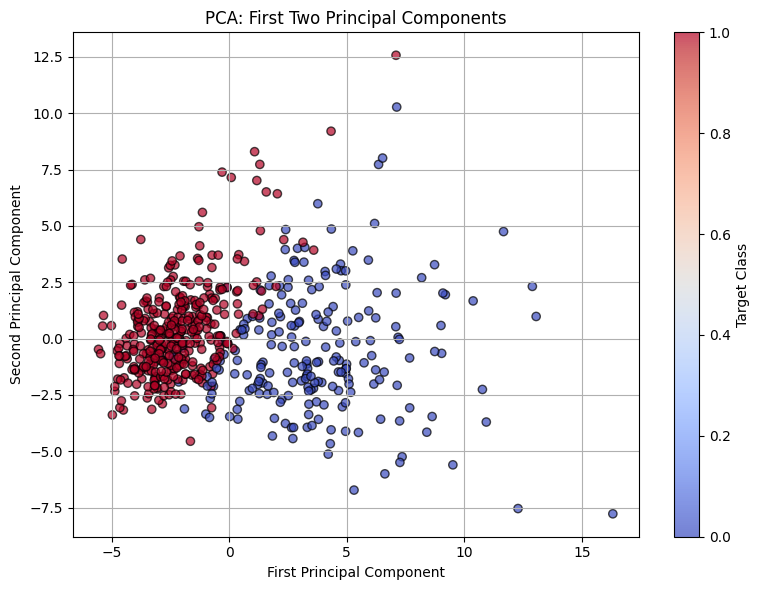

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and plot scree plot
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Retain 95% variance and transform the dataset
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

# 4. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_pca_train, X_pca_test = train_test_split(X_pca_95, test_size=0.3, random_state=42, stratify=y)

# Train KNN on original data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_orig = knn.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy on Original Data: {acc_orig:.4f}")
print(f"Accuracy on PCA-Reduced Data (95% variance): {acc_pca:.4f}")

# 5. Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Target Class')
plt.grid(True)
plt.tight_layout()
plt.show()


9) KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


MSE (Euclidean, K=5): 4837.04
MSE (Manhattan, K=5): 5428.59


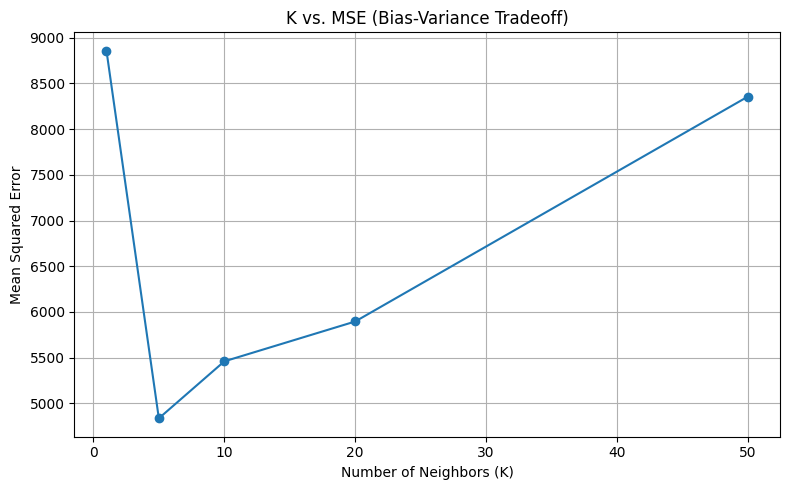

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train KNN Regressor with Euclidean (default) and Manhattan distances
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print(f"MSE (Euclidean, K=5): {mse_euclidean:.2f}")
print(f"MSE (Manhattan, K=5): {mse_manhattan:.2f}")

# 3. Analyze K vs. MSE for bias-variance tradeoff
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plotting K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o')
plt.title('K vs. MSE (Bias-Variance Tradeoff)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()


10) KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes


🔍 KNN Algorithm Comparison:
Algorithm: brute, Accuracy: 0.7359, Training Time: 0.0077 sec
Algorithm: kd_tree, Accuracy: 0.7359, Training Time: 0.0048 sec
Algorithm: ball_tree, Accuracy: 0.7359, Training Time: 0.0084 sec


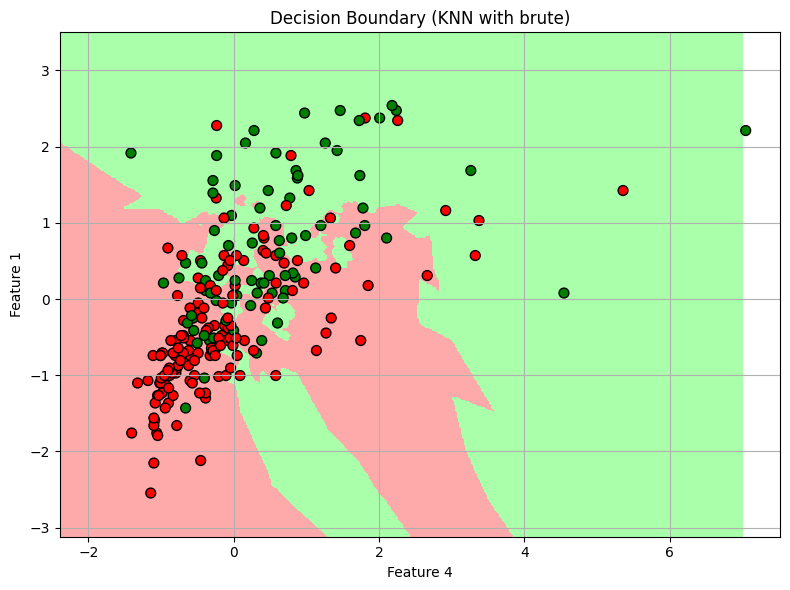

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from matplotlib.colors import ListedColormap

# 1. Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
           'BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv(url, names=columns)

# Replace 0s in some columns with NaN (indicates missing values)
cols_with_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# 2. KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=columns)

# Features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 3. Train KNN using different algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

for algo in algorithms:
    model = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((algo, acc, end - start))

# 4. Compare training time and accuracy
print("🔍 KNN Algorithm Comparison:")
for algo, acc, duration in results:
    print(f"Algorithm: {algo}, Accuracy: {acc:.4f}, Training Time: {duration:.4f} sec")

# 5. Plot decision boundary for best method (using 2 most important features)
# Select 2 most informative features using mutual information
mi_scores = mutual_info_classif(X_scaled, y)
top2_indices = np.argsort(mi_scores)[-2:]
X_top2 = X_scaled[:, top2_indices]

# Re-train best algorithm on top 2 features
best_algo = max(results, key=lambda x: x[1])[0]
X2_train, X2_test, y2_train, y2_test = train_test_split(X_top2, y, test_size=0.3, random_state=42, stratify=y)
best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_knn.fit(X2_train, y2_train)

# Plot decision boundary
h = .02
x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ['red', 'green']

plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X2_test[:, 0], X2_test[:, 1], c=y2_test, cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)
plt.title(f"Decision Boundary (KNN with {best_algo})")
plt.xlabel(f"Feature {top2_indices[0]}"); plt.ylabel(f"Feature {top2_indices[1]}")
plt.grid(True)
plt.tight_layout()
plt.show()
